In [1]:
import nltk
nltk.download('popular')
import itertools
#from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
#import plotly
#plotly.offline.init_notebook_mode(connected=True)
#import plotly.graph_objects as go
import matplotlib 
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from collections import Counter
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/shannonchen/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/shannonchen/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/shannonchen/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/shannonchen/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/shannonchen/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/shannonchen/nltk_data...
[nltk_data]    |   Pa

In [2]:
# Storing text into list
anthemtext = []
with open('anthem.txt') as inputfile:
    for line in inputfile:
        anthemtext.append(line.strip().split(','))

In [3]:
## Preprocessing 

anthemtext[:] = (value for value in anthemtext if value != ['']) #Removed all empty strings

anthemfull = list(itertools.chain.from_iterable(anthemtext)) 
anthemfull[5:30] #Text after removing empty strings

['evil. It is as if we were speaking alone to no ears but our own. And',
 'we know well that there is no transgression blacker than to do or think',
 'alone. We have broken the laws. The laws say that men may not write',
 'unless the Council of Vocations bid them so. May we be forgiven!',
 'But this is not the only sin upon us. We have committed a greater crime',
 '',
 'and for this crime there is no name. What punishment awaits us if it be',
 'discovered we know not',
 ' for no such crime has come in the memory of men',
 'and there are no laws to provide for it.',
 'It is dark here. The flame of the candle stands still in the air.',
 'Nothing moves in this tunnel save our hand on the paper. We are alone',
 'here under the earth. It is a fearful word',
 ' alone. The laws say that',
 'none among men may be alone',
 ' ever and at any time',
 ' for this is the great',
 'transgression and the root of all evil. But we have broken many laws.',
 'And now there is nothing here save our one bod

In [4]:
# Tokenization, Removal of Stopwords and Punctuation

def tokenized(text):
    token = list(itertools.chain.from_iterable(map(word_tokenize, text)))
    stop_words=list(stopwords.words("english"))
    token[:] = (word for word in token if word not in stop_words)
    tokens_no_punc = [''.join(c for c in s if c not in string.punctuation) for s in token]
    tokensfinal = [s for s in tokens_no_punc if s]
    return tokensfinal

anthemtokens = tokenized(anthemfull)
anthemtokens[10:30]


['think',
 'words',
 'others',
 'think',
 'put',
 'upon',
 'paper',
 'others',
 'see',
 'It',
 'base',
 'evil',
 'It',
 'speaking',
 'alone',
 'ears',
 'And',
 'know',
 'well',
 'transgression']

In [5]:
# Frequency counts of top 30 words in the text
fdist = FreqDist(anthemtokens)
fdist.plot(30,cumulative=False)

<Figure size 640x480 with 1 Axes>

In [6]:
# Finding the Stems of Relevant Words

def stemming(text):
    ps = PorterStemmer()
    stemmed = []
    stemmed[:] = (ps.stem(word) for word in text) #Stemmed words
    return stemmed

anthemstem = stemming(anthemtokens)
anthemstem[10:30]

['think',
 'word',
 'other',
 'think',
 'put',
 'upon',
 'paper',
 'other',
 'see',
 'It',
 'base',
 'evil',
 'It',
 'speak',
 'alon',
 'ear',
 'and',
 'know',
 'well',
 'transgress']

In [7]:
# Lemmatizing Words

def lemmatizer(text):
    lemming = WordNetLemmatizer()
    lemmatized = []
    lemmatized[:] = (lemming.lemmatize(word) for word in text) #Lemmatized Words
    return lemmatized

anthemlemma = lemmatizer(anthemtokens)
anthemlemma[10:30]

['think',
 'word',
 'others',
 'think',
 'put',
 'upon',
 'paper',
 'others',
 'see',
 'It',
 'base',
 'evil',
 'It',
 'speaking',
 'alone',
 'ear',
 'And',
 'know',
 'well',
 'transgression']

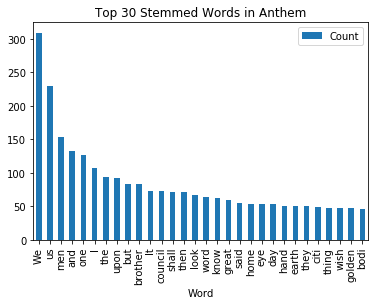

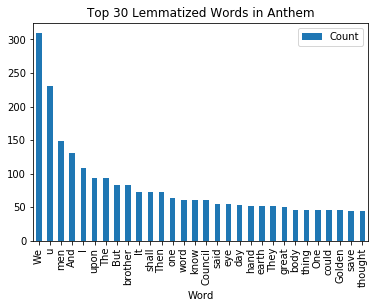

In [9]:
# Create bar graph of word counts

def countergraph(text, titlename):
    count = Counter(text)
    mostfreq = count.most_common(30)
    freqdf = pd.DataFrame(mostfreq, columns = ['Word', 'Count'])
    freqdf.plot.bar(x='Word', y='Count', title = titlename)

stemgraph = countergraph(anthemstem, "Top 30 Stemmed Words in Anthem")
lemmagraph = countergraph(anthemlemma, "Top 30 Lemmatized Words in Anthem")

In [18]:
# Count Vectorizer for Lemmatized words

count_vect_lem = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')

lem_term_matrix = count_vect_lem.fit_transform(anthemlemma)

In [19]:
## LDA Topic Modelling for Lemmatized words 

lem_lda = LatentDirichletAllocation(n_components=5, random_state=0)
lem_lda.fit(lem_term_matrix)

for i,topic in enumerate(lem_lda.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect_lem.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

Top 10 words for topic #0:
['water', 'moved', 'walk', 'tunnel', 'end', 'spirit', 'woman', 'say', 'heart', 'fear', 'wall', 'voice', 'box', 'white', 'came', 'body', 'said', 'council', 'brother', 'men']


Top 10 words for topic #1:
['long', 'new', 'liberty', 'candle', 'brought', 'road', 'strange', 'look', 'face', 'speak', 'think', 'street', 'light', 'year', 'like', 'city', 'save', 'thing', 'hand', 'great']


Top 10 words for topic #2:
['times', 'understand', 'bed', 'raised', 'stone', 'place', '53000', 'tree', '72521', 'wonder', 'wished', 'international', 'secret', 'wire', 'man', 'come', 'evil', 'world', 'day', 'eye']


Top 10 words for topic #3:
['mind', 'fell', 'good', 'straight', 'asked', 'metal', 'iron', 'equality', 'heard', 'house', 'head', 'stood', 'forest', 'sky', 'scholars', 'saw', 'knew', 'home', 'know', 'shall']


Top 10 words for topic #4:
['sun', 'suddenly', 'hall', 'answered', 'law', 'away', 'let', 'walked', 'glass', 'arm', 'time', 'power', 'night', 'work', 'wish', 'looked', '

In [21]:
# Count Vectorizer for Stemmed Words

count_vect_stem = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')

stem_term_matrix = count_vect_stem.fit_transform(anthemstem)

In [22]:
## LDA Topic Modelling for Stemmed words 

stem_lda = LatentDirichletAllocation(n_components=5, random_state=0)
stem_lda.fit(stem_term_matrix)

for i,topic in enumerate(stem_lda.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect_stem.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

Top 10 words for topic #0:
['flame', 'metal', 'straight', '48818', 'wall', 'secret', 'away', 'evil', 'stood', 'world', 'sky', 'walk', 'thought', 'bodi', 'citi', 'said', 'great', 'shall', 'council', 'brother']


Top 10 words for topic #1:
['smile', 'reason', 'suddenli', 'sun', 'brought', 'road', 'say', 'turn', 'candl', 'voic', 'strang', 'hous', 'ask', 'live', 'head', 'night', 'knew', 'thing', 'look', 'men']


Top 10 words for topic #2:
['intern', 'heard', 'hall', 'wonder', 'box', 'sweeper', 'arm', 'power', 'learn', 'forest', 'mani', 'light', 'year', 'speak', 'like', 'save', 'wish', 'earth', 'day', 'word']


Top 10 words for topic #3:
['whisper', 'life', 'water', 'understand', 'crime', 'stone', '53000', 'hour', 'lie', '72521', 'tree', 'iron', 'let', 'wire', 'man', 'thi', 'saw', 'hand', 'eye', 'know']


Top 10 words for topic #4:
['women', 'equal', 'follow', 'fear', 'stop', 'white', 'glass', 'answer', 'came', 'come', 'face', 'alon', 'street', 'think', 'work', 'scholar', 'noth', 'time', 'g